# K-Means Clustering

## Importing the libraries

In [1]:
# Numerical and plotting libraries
import numpy as np  # fast numerical arrays and operations
import matplotlib.pyplot as plt  # plotting library for visualizations
import pandas as pd  # data loading and manipulation (CSV -> DataFrame)
import pickle  # saving and loading trained models

## Importing the dataset

In [2]:
# Load dataset from CSV. Ensure the CSV `Mall_Customers.csv` is in the same folder.
# We extract the two features used for clustering: Annual Income (column index 3)
# and Spending Score (column index 4). These are stored in `X` as a 2-D numpy array.
dataset = pd.read_csv('Mall_Customers.csv')

# Select only the Annual Income and Spending Score columns for clustering
X = dataset.iloc[:, [3, 4]].values

FileNotFoundError: [Errno 2] No such file or directory: 'Mall_Customers.csv'

## Using the elbow method to find the optimal number of clusters

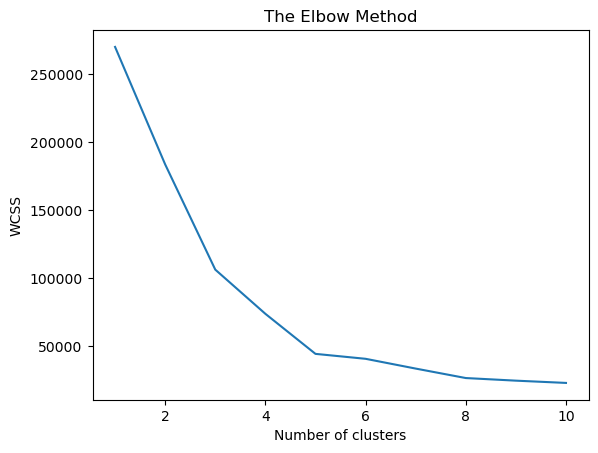

In [ ]:
# Use the Elbow Method to help choose a good value for k (number of clusters).
# We compute WCSS (within-cluster sum of squares / inertia) for k=1..10
# and plot the curve. The elbow (where improvement decreases) suggests k.
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    # initialize KMeans with k=i and the k-means++ initialization
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    # inertia_ is the WCSS value (lower is better for fitting)
    wcss.append(kmeans.inertia_)

# Plot WCSS vs k to visually inspect the elbow
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [ ]:
# Train the final KMeans model using the chosen number of clusters.
# Here we use k=5 (based on prior inspection). The `fit_predict` call both
# fits the model to X and returns the cluster labels for each sample.

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)  # y_kmeans contains integers 0..4 indicating cluster assignment

## Visualising the clusters

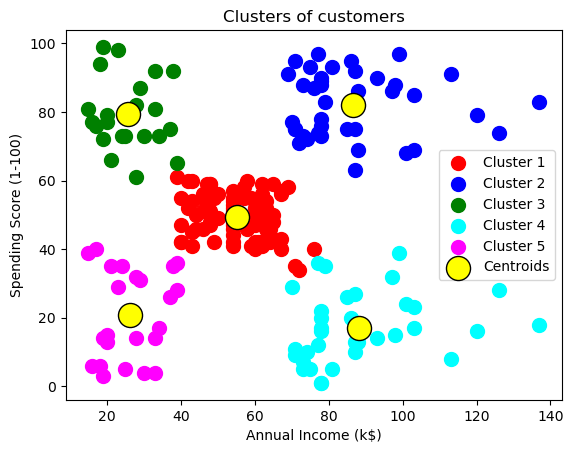

In [ ]:
# Visualise the clusters and centroids.
# We plot the points for each cluster with a different color, then overlay
# the cluster centroids computed by KMeans as larger markers.

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

# Plot centroids returned by the fitted KMeans estimator
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids', edgecolors='black')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Saving the Model to Pickle

In [ ]:
# Import pickle module for serialization (converting Python objects to bytes for storage)
import pickle

# Create a dictionary containing the model and training data.
# This allows the Flask app (or any other consumer) to load the model and
# reconstruct the cluster centers and training info without retraining.
model_data = {
    'model': kmeans,  # the trained KMeans estimator
    'X_train': X,  # training features (Annual Income and Spending Score)
    'y_train': y_kmeans  # cluster labels assigned to each training sample
}

# Serialize the model data to a binary file using pickle.dump()
# This converts the Python dictionary to bytes and writes it to disk.
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

print("✓ Model serialized and saved to 'kmeans_model.pkl'")
print(f"  - Contains: trained KMeans model, {len(X)} training samples, {len(np.unique(y_kmeans))} clusters")

## Loading and Predicting with the Pickled Model

In [ ]:
# Load the pickled model data from disk using pickle.load()
# This reconstructs the Python dictionary containing the model and training info.
with open('kmeans_model.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

# Extract the model and training data
loaded_model = loaded_data['model']
X_train = loaded_data['X_train']
y_train = loaded_data['y_train']

print("✓ Model loaded from 'kmeans_model.pkl'")
print(f"  - KMeans clusters: {loaded_model.n_clusters}")
print(f"  - Training samples: {len(X_train)}")

# Demonstrate prediction on new customer data
# Test case 1: Customer with high income and low spending score
new_customer_1 = np.array([[85, 20]])  # Income: 85k, Spending Score: 20
predicted_cluster_1 = loaded_model.predict(new_customer_1)[0] + 1  # +1 to convert 0-index to 1-5

# Test case 2: Customer with low income and high spending score
new_customer_2 = np.array([[30, 80]])  # Income: 30k, Spending Score: 80
predicted_cluster_2 = loaded_model.predict(new_customer_2)[0] + 1

# Test case 3: Customer with medium income and medium spending score
new_customer_3 = np.array([[50, 50]])  # Income: 50k, Spending Score: 50
predicted_cluster_3 = loaded_model.predict(new_customer_3)[0] + 1

# Display predictions
print("\n--- Predictions on New Customers ---")
print(f"Customer 1 (Income: 85k, Spending Score: 20) → Cluster {predicted_cluster_1}")
print(f"Customer 2 (Income: 30k, Spending Score: 80) → Cluster {predicted_cluster_2}")
print(f"Customer 3 (Income: 50k, Spending Score: 50) → Cluster {predicted_cluster_3}")